In [57]:
import re
import numpy as np
from helpers import get_graph
import torch
import networkx as nx
import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [58]:
import os
os.system(r'rm -r data_processed/*.pt')

def files_with_extension(directory, extension):
    file_list = []

    for root, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith(extension):
                    file_list.append(os.path.join(root,file))

    file_list.sort()  # Sofile_listrt the file names alphabetically
    return file_list

# Provide the directory path and file extension
directory_path =  os.getcwd() + '/data_raw'
file_extension = '.xyz'


# all .xyz files 
file_list = files_with_extension(directory_path, file_extension)


rm: data_processed/*.pt: No such file or directory


In [59]:
# all .xyz files in a the working directory
for file in file_list:
    print(file)

/Users/menelaos/Desktop/znclusters/data_raw/Ni3_zn_double_trj.xyz
/Users/menelaos/Desktop/znclusters/data_raw/Ni3_zn_single_trj.xyz
/Users/menelaos/Desktop/znclusters/data_raw/Ni3_zn_top_trj.xyz
/Users/menelaos/Desktop/znclusters/data_raw/Ni6_rot_zn_double_trj.xyz
/Users/menelaos/Desktop/znclusters/data_raw/Ni6_rot_zn_top_trj.xyz
/Users/menelaos/Desktop/znclusters/data_raw/Ni6_zn_double_trj.xyz
/Users/menelaos/Desktop/znclusters/data_raw/Ni6_zn_top_trj.xyz


In [ ]:
graph_list = []
energies = []
index = [0,3,-1] # which iterations of the files to pick: we pick the last ones, since they have the lowest energy

for filename in file_list:
        # do a loop over all .xyz files
        i = 0
        atoms = None
        coordinates = None
        e_value = None
        graph_temp = []
        energy_temp = []

        with open(filename, 'r') as f: 
                if "6" in filename:
                        if "rot" in filename:
                               offset = -10408.779936334086
                               print(filename, "six rotated")

                        else: 
                              print(filename, "six")

                              offset = -10408.763541094204
                if '3' in filename:
                       print(filename, "three")

                       offset = -5204.455811711983
                # opens .xyz file and saves atoms, coordinates and target
                for line in f: 
                        if line.strip().isdigit():  #check the start of a new iteration
                            atom_num = int(line.strip())
                            i+=1
                            atom_count = 0
                            atoms = []              # atoms in clusters
                            coordinates = []        # atom coordinates of clusters
                        pattern = r'E\s+\s*([+-]?\d+\.\d+)' # searches for energy (anywhere in string)
                        result = re.search(pattern, line)   
                        if result:            
                                e_value = float(result.group(1))  - offset
                                energy_temp.append(e_value)
                                continue
                        pattern = r'^\s+[A-Z][a-z]?' # matches elements coordinates (at beginning of string)
                        if re.match(pattern, line): 
                                atom, x1, x2, x3 = line.split()
                                atoms.append(atom)
                                coordinates.append([float(x1), float(x2), float(x3)])
                                atom_count+=1
                        if atom_count == atom_num:
                            # save last molecule in .xyz file
                            atoms = np.array(atoms)
                            coordinates = np.array(coordinates) # TODO: check shape
                            a =get_graph(atoms, coordinates, e_value)
                            
                            graph_temp.append(a) 
                            

                print(f'Found {i} iterations in file {filename}') 
                if i > 1: # some files contain many iterations, for these files we select the last iterations (i.e. index -1,-2, etc.)
                        graph_temp = [graph_temp[ind] for ind in index]
                        energy_temp = [energy_temp[ind] for ind in index]
                for graph in graph_temp:
                        graph_list.append(graph)
                for energy in energy_temp:
                        energies.append(energy)

print(graph)
print('energies', energies)
# node_labels = [f'{i}' for i in range(1, 17)]
# plt.imshow(b, cmap='binary', interpolation='none')
# plt.colorbar()
# plt.xticks(np.arange(16), labels=node_labels)
# plt.yticks(np.arange(16), labels=node_labels)
# plt.show()

In [61]:
# get adsorption energy by subtracting isolated energies
# isolated_en_cluster = -1778.725143985331
# isolated_en_mol = -1038.350912875803
# isolated_en_cluster = -1778.725143985331
# isolated_en_mol = -1038.350912875803
# uncorrected = np.array([-5995.369782,-5995.365433 , -5995.366846 , -5995.36561 , -5995.369098 ])
# for i in range(5):
#     energies[-i] = uncorrected[-i]
# energies = np.asarray(energies) -(isolated_en_cluster + isolated_en_mol)


print('graph', np.array(graph_list).shape)
# graph_list = np.array(graph_list)
# for i in range(graph_list.shape[0]):
#     for j in range(graph_list.shape[1]):
#         print(graph_list[i][j])

graph (21, 4, 2)


/var/folders/3s/q9d61ngn2b3bm9s2ywhwmyfm0000gn/T/ipykernel_49893/3406214066.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print('graph', np.array(graph_list).shape)


In [62]:
def normalization(a):
    return (a - a.min(axis = 0))/(a.max(axis = 0) - a.min(axis = 0)), a.max(axis = 0), a.min(axis = 0)

def normalization_with_inputs(a, amax, amin):
    return (a - amin)/(amax - amin)

def reverse_normalization(a,amax,amin):
    return a*(amax-amin) + amin
   

mean -1778.8730868753953
std 0.04648539097338326
energies [-1778.9388124848665, -1778.9401004776646, -1778.9413014288702, -1778.8195247850826, -1778.841267182519, -1778.867851959476, -1778.9081385658965, -1778.9197593909457, -1778.9412315713435, -1778.8455701891962, -1778.8550371094043, -1778.8865778574072, -1778.853018635622, -1778.8622398742082, -1778.8884536431851, -1778.7842303078723, -1778.7952656184298, -1778.8171021928174, -1778.8610305679304, -1778.869029355341, -1778.8992811852204]
Data(x=[16, 3], edge_index=[2, 58], edge_attr=[58, 2], y=0.01584596829723661)
[1.58459683e-02 7.64590714e-03 0.00000000e+00 7.75296203e-01
 6.36872302e-01 4.67619184e-01 2.11132783e-01 1.37148304e-01
 4.44750928e-04 6.09477026e-01 5.49205474e-01 3.48399955e-01
 5.62056174e-01 5.03348764e-01 3.36457685e-01 1.00000000e+00
 9.29743224e-01 7.90719741e-01 5.11047864e-01 4.60123243e-01
 2.67523676e-01]
(21,)


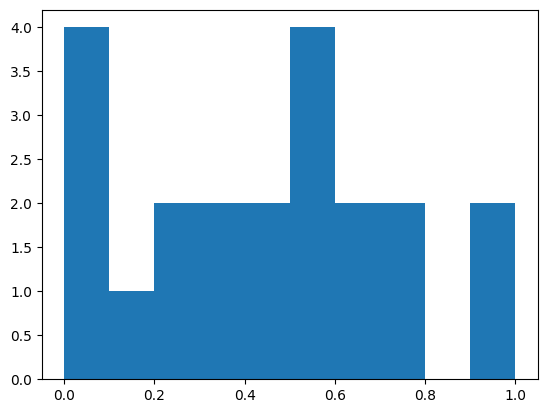

In [63]:
# # normalize target

mean = np.mean(energies)
print('mean', mean)
std = np.std(energies)
print('std', std)
# energies = (energies - mean) / std # normalization
print('energies', energies)
energies = np.array(energies)
energies = normalization(energies)[0]
# energies[]
for i in range(len(graph_list)):
        graph_list[i].y = energies[i]

import matplotlib.pyplot as plt

plt.hist(energies)
print(graph_list[0])
print(energies)
print(energies.shape)

In [64]:
# save graphs to .pt file
import torch
root_path = os.getcwd() + '/data_processed/'
print(root_path)
for i, graph in enumerate(graph_list):
    filename = f'data_{i}.pt' # consider saving dictionary with 'to_dict' method
    torch.save(graph_list[i], os.path.join(root_path, filename))


loaded_graph_list = torch.load(os.path.join(root_path, filename))

/Users/menelaos/Desktop/znclusters/data_processed/


In [65]:
print(len(loaded_graph_list))
loaded_graph_list.edge_attrs



4


<bound method BaseData.edge_attrs of Data(x=[31, 3], edge_index=[2, 117], edge_attr=[117, 2], y=0.26752367579028585)>

In [66]:
# # TODO: save atoms

# atoms = []
# with open('data_raw/IT1/IT1_pos1.xyz', 'r') as f:  # use a generic file with only one DFT
#         # opens .xyz file and saves atoms, coordinates and target
#         for line in f: 
#                 pattern = r'^\s+[A-Z][a-z]?' # matches elements coordinates (at beginning of string)
#                 if re.match(pattern, line): 
#                         atom, _, _, _ = line.split()
#                         atoms.append(atom)
# print(atoms)

# with open('data_processed/atoms.txt', 'w') as file:
#     for string in atoms:
#         file.write(string + '\n')


In [67]:
root_path = os.getcwd() + '/data_processed/'
filenames = os.listdir(root_path)
filenames.sort()
# debug: 
# filenames = filenames[:6]
for filename in filenames:
    if filename.endswith('.pt'):
        graph = torch.load(os.path.join(root_path, filename)) 


In [49]:
graph.edge_attr.shape

torch.Size([119, 2])

In [44]:
graph.pos.dtype

AttributeError: 'NoneType' object has no attribute 'dtype'

In [52]:
model = torch.load(root_path +'/data_0.pt')

print(model)
print(dir(model))
print(model.edge_attr.numpy())


Data(x=[16, 3], edge_index=[2, 256], edge_attr=[256, 3], y=-6983.39453125)
['__call__', '__cat_dim__', '__class__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__inc__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_edge_attr_cls', '_edge_to_layout', '_edges_to_layout', '_get_edge_index', '_get_tensor', '_get_tensor_size', '_multi_get_tensor', '_put_edge_index', '_put_tensor', '_remove_edge_index', '_remove_tensor', '_store', '_tensor_attr_cls', '_to_type', 'apply', 'apply_', 'batch', 'clone', 'coalesce', 'contains_isolated_nodes', 'contains_self_loops', 'contiguous', 'coo', 'cpu', 'csc', '